In [1]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(1, "../python/functions")

In [2]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

from plotting_functions import nn_plot_acc
from enkf_functions import enkf_classifier
from saving_functions import load_objects
from model_functions import nn_load
from data_prep_functions import connect4_prep

In [3]:
X_train, X_test, y_train, y_test = connect4_prep()

In [4]:
X_train = X_train[:1000, :]
X_test = X_test[:150, :]
y_train = y_train[:1000]
y_test = y_test[:150]

In [5]:
layers = 2
neurons = [16, 3]

In [6]:
setting_dict = {"particles": 100,
                "epochs": 10,
                "batch_size": 50,    # len(X_train)
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [7]:
import time
start_time = time.time()

In [8]:
mean_model = enkf_classifier(X_train,
                             X_test,
                             y_train,
                             y_test,
                             layers,
                             neurons,
                             setting_dict,
                             save_all = True,
                             file_var = "../objects/connect_4/connect4_enkf_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                             file_model = "../models/connect_4/connect4_enkf_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                             verbose = 0)

In [9]:
end_time = time.time()
print("Calculation time: {} minutes.".format((end_time - start_time) / 60))

Calculation time: 5.9499616622924805 minutes.


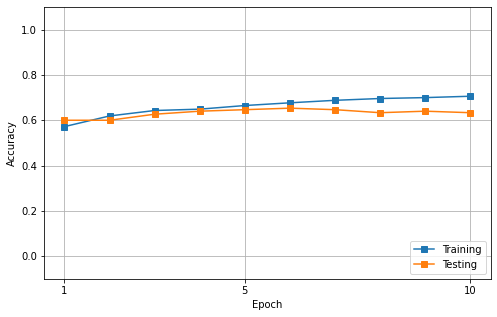

In [10]:
nn_plot_acc(mean_model,
            mean_comparison = None,
            start_epoch = 1,
            savefig = True,
            file = "../img/connect_4/connect4_enkf_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))